<a href="https://colab.research.google.com/github/alminha021/DS-rcf/blob/main/CV_ex4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving lena.png to lena (7).png


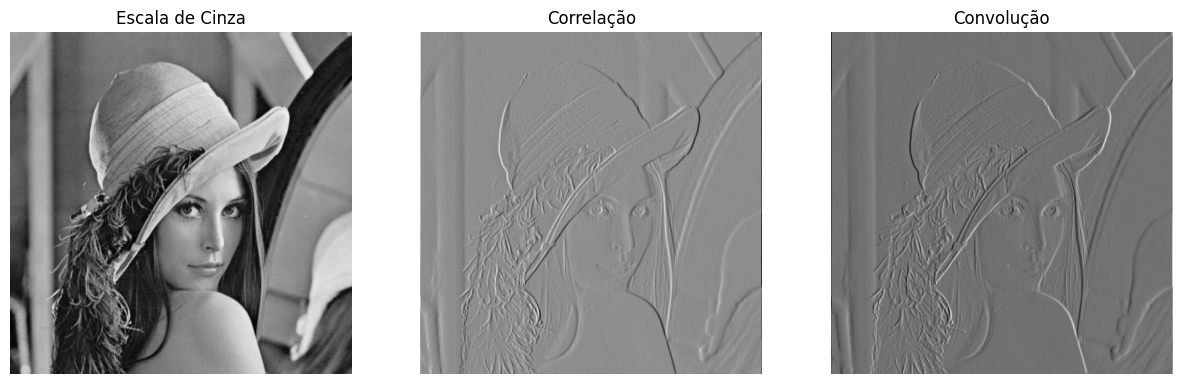

In [15]:
# Instala OpenCV no Colab (necessário apenas no Colab)
# !pip install opencv-python

import cv2
import numpy as np
from google.colab import files
from matplotlib import pyplot as plt
from PIL import Image

uploaded = files.upload()
for filename in uploaded.keys():
    imagem_colorida = cv2.imread(filename)
    break

# escala de cinzaa
imagem_cinza = cv2.cvtColor(imagem_colorida, cv2.COLOR_BGR2GRAY)

# Correlação
def correlacao(imagem, kernel):
    M, N = imagem.shape
    m, n = kernel.shape

    x1 = m // 2
    y1 = n // 2

    #Na operação de filtragem, deve-se calcular os pontos pertencentes à borda de modo diferente dos demais, já que estes não dispõem de todos os vizinhos.
    imagem_padded = np.pad(imagem, ((x1, x1), (y1, y1)), mode='constant')
    g = np.zeros_like(imagem, dtype=np.float32)

    for x in range(M):
        for y in range(N):
            soma = 0.0
            for i in range(-x1, x1 + 1):
                for j in range(-y1, y1 + 1):
                    pixel = imagem_padded[x + i + x1, y + j + y1]
                    peso = kernel[i + x1, j + y1]
                    soma += peso * pixel
            g[x, y] = soma

    return g

#Convolução
def convolucao(imagem, kernel):
    kernel_invertido = np.flipud(np.fliplr(kernel))  # inversão do kernel
    return correlacao(imagem, kernel_invertido)


def mostrar_resultados(imagem_original, correlacao, convolucao):
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    plt.imshow(imagem_original, cmap='gray')
    plt.title('Escala de Cinza')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(correlacao, cmap='gray')
    plt.title('Correlação')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(convolucao, cmap='gray')
    plt.title('Convolução')
    plt.axis('off')

    plt.show()

# filtro
filtro = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
], dtype=np.float32)


resultado_correlacao = correlacao(imagem_cinza, filtro)
resultado_convolucao = convolucao(imagem_cinza, filtro)
mostrar_resultados(imagem_cinza, resultado_correlacao, resultado_convolucao)
